In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.src.utils import to_categorical
from keras.src.models import Sequential
from keras.src.layers import Dense, Input

/Users/julek/PycharmProjects/AILabs/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# Load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
# Normalize images to [0, 1]
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

In [4]:
# Get image dimensions
img_rows, img_cols = train_images.shape[1], train_images.shape[2]
num_train = train_images.shape[0]
num_test = test_images.shape[0]

In [5]:
# Flatten images (each image becomes a 784-dimensional vector)
train_images_flat = train_images.reshape(num_train, img_rows * img_cols)
test_images_flat = test_images.reshape(num_test, img_rows * img_cols)

In [6]:
# One-hot encode labels for classification
train_labels_cat = to_categorical(train_labels, 10)
test_labels_cat = to_categorical(test_labels, 10)

In [7]:
classifier = Sequential([
    Input(shape=(img_rows * img_cols,)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

classifier.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

In [8]:
# Train classifier
classifier.fit(train_images_flat, train_labels_cat, epochs=6, batch_size=32, verbose=1)

Epoch 1/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 863us/step - accuracy: 0.8771 - loss: 0.4343
Epoch 2/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 752us/step - accuracy: 0.9627 - loss: 0.1250
Epoch 3/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 709us/step - accuracy: 0.9754 - loss: 0.0806
Epoch 4/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 721us/step - accuracy: 0.9798 - loss: 0.0648
Epoch 5/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 709us/step - accuracy: 0.9856 - loss: 0.0472
Epoch 6/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 716us/step - accuracy: 0.9894 - loss: 0.0349


In [9]:
# Evaluate classifier on test set
test_loss, test_acc = classifier.evaluate(test_images_flat, test_labels_cat, verbose=0)
print("Classifier Test Accuracy: {:.2f}%".format(test_acc * 100))

Classifier Test Accuracy: 97.79%


In [10]:
# Get predictions for first 25 test samples
predictions = classifier.predict(test_images_flat[:25])
predicted_labels = np.argmax(predictions, axis=1)
print("Predicted labels for first 25 test samples:", predicted_labels)
print("True labels for first 25 test samples:     ", test_labels[:25])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted labels for first 25 test samples: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4]
True labels for first 25 test samples:      [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4]


In [11]:
autoencoder = Sequential([
    Input(shape=(img_rows * img_cols,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),  # Bottleneck layer (latent representation)
    Dense(128, activation='relu'),
    Dense(img_rows * img_cols, activation='sigmoid')
])

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train autoencoder (input equals target)
autoencoder.fit(train_images_flat, train_images_flat,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(test_images_flat, test_images_flat),
                verbose=1)

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3217 - val_loss: 0.1438
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1346 - val_loss: 0.1137
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1122 - val_loss: 0.1029
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1027 - val_loss: 0.0965
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0969 - val_loss: 0.0927
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0933 - val_loss: 0.0901
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0908 - val_loss: 0.0880
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0888 - val_loss: 0.0867
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0874 - val_loss: 0.0857
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0862 - val_loss: 0.0843
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0852 - val_loss: 0.0834
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

In [12]:
# Use the autoencoder to reconstruct test images
reconstructed = autoencoder.predict(test_images_flat)

# Use the classifier to predict labels on reconstructed images
reconstructed_pred = classifier.predict(reconstructed)
reconstructed_labels = np.argmax(reconstructed_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step


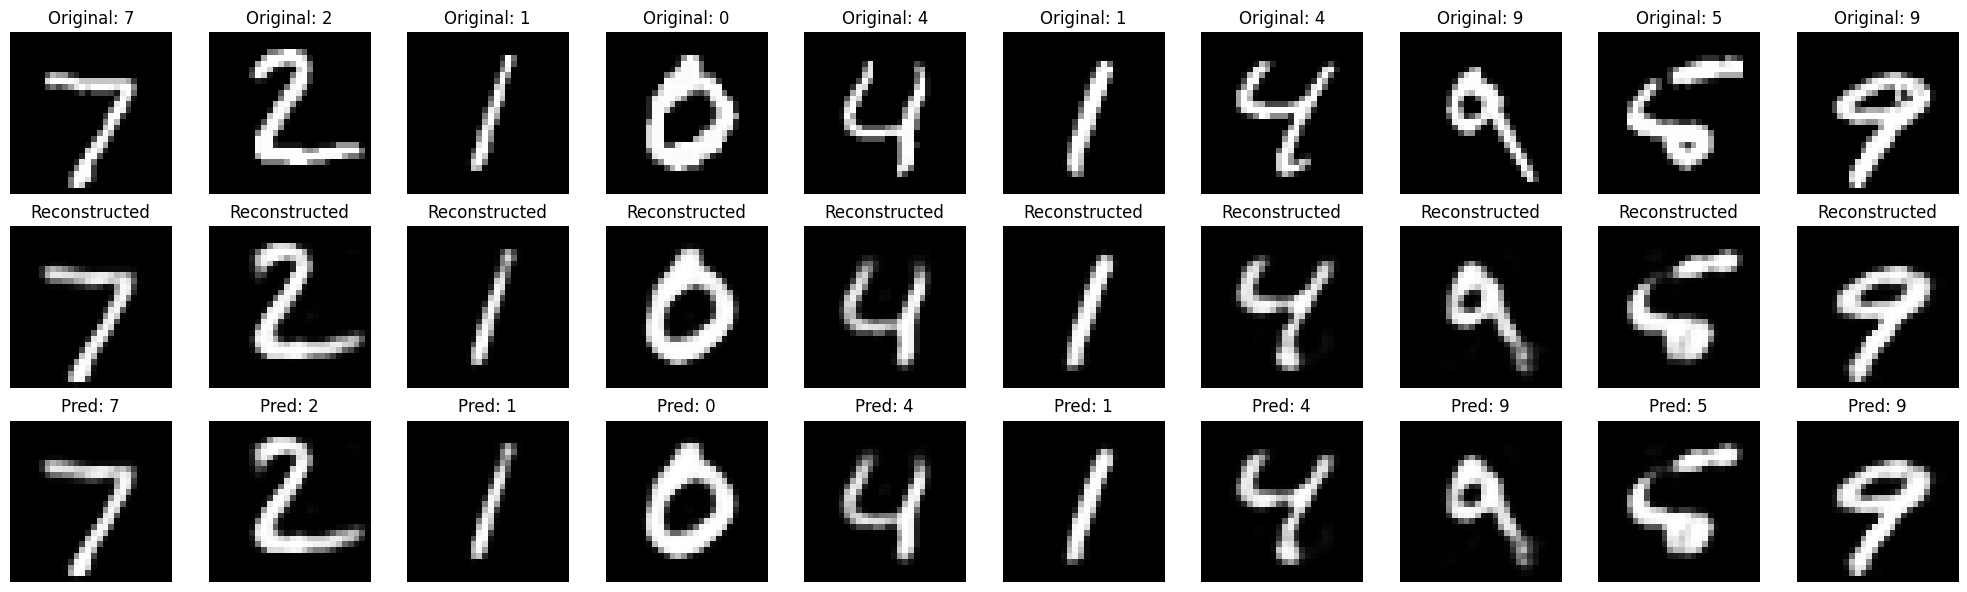

In [14]:
n = 10  # number of samples to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Original image with true label
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(test_images[i], cmap='gray')
    plt.title("Original: {}".format(test_labels[i]))
    plt.axis('off')

    # Reconstructed image
    ax = plt.subplot(3, n, i + 1 + n)
    reconstructed_image = reconstructed[i].reshape(img_rows, img_cols)
    plt.imshow(reconstructed_image, cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

    # Reconstructed image with classifier prediction
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(reconstructed_image, cmap='gray')
    plt.title("Pred: {}".format(reconstructed_labels[i]))
    plt.axis('off')

plt.tight_layout()
plt.show()